# Loups vs ours vs rien

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder("data", valid_pct=0.2, ds_tfms=tfms, size =224) # adding the "size" is necessary
# we're having fastai consider that the images are 224*224 squares : it's necessary for GPU processing
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (524 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
loup,loup,loup,loup,loup
Path: data;

Valid: LabelList (130 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
loup,ours,ours,autre,autre
Path: data;

Test: None

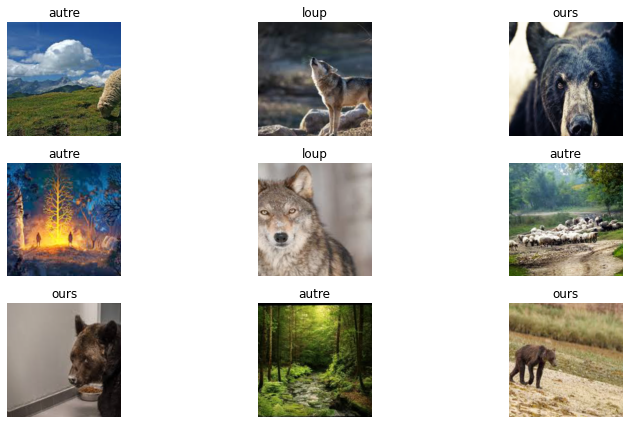

In [4]:
data.show_batch(rows=3, figsize=(12,6))

In [5]:
lrnr = cnn_learner(data, models.resnet18, metrics=error_rate)

In [6]:
lrnr.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.985199,0.622893,0.107692,02:07
1,0.547355,0.327771,0.053846,02:00


In [7]:
lrnr.save("weights-02")

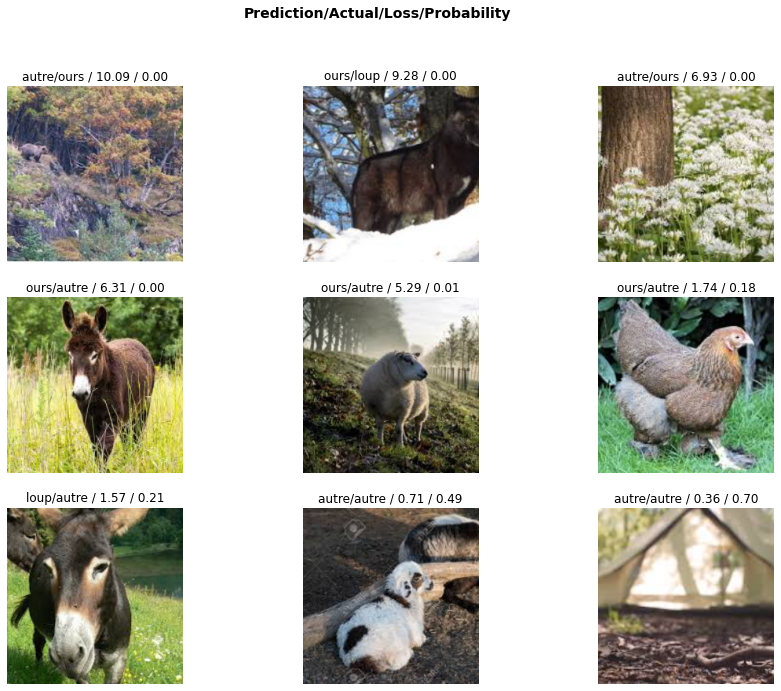

In [8]:
interp = ClassificationInterpretation.from_learner(lrnr)
interp.plot_top_losses(9, figsize=(15, 11))

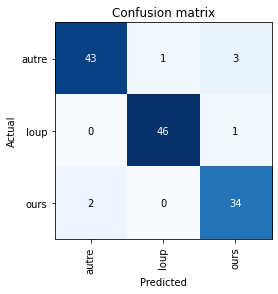

In [9]:
interp.plot_confusion_matrix(figsize=(4,4))

## Etape 1 :

- Beaucoup d'images inappropriées dans le jeu scrappé
- Le modèle tourne, même entraîné douloureusement sur MacBook (CPU)
- Il va désormais falloir rajouter une classe "autre / forêt". Se renseigner sur comment faire. Idéalement, ce sera fait avec des images prises par les appareils photo du refuge.

## Etape 2 :

Modifié le jeu de données de la manière suivante :
- Retiré un tas d'images parasites dans les "loup" et les "ours" (cadavres, images dessinées...)
- Créé un nouveau dossier (classe) "autre" avec des images de forêt, de prairie, d'ânes, de poules et de moutons.


Remarques / résultats :
- Après 2 epochs, et aucun tweak (ex : unfreeze + find max lr) on atteint ~95% d'accuracy sur le jeu de validation
- C'est relativement satisfaisant, pour un travail fait en urgence
- Il reste de nombreuses pistes d'amélioration, à commencer par une amélioration du jeu de données : il reste encore des erreurs liées à des images "parasites". On manque aussi de données "autres", qu'il sera bon d'alimenter avec des images obtenues des appareils photo utilisés en production.